<h1>Bayes' Theorem & Posterior Probability</h1>

<br>


<p>Bayes' theorem consists of probabilities, not single numbers, that are used to estimate model parameters. This can be useful when communicating analysis and <i>likely outcomes</i> to stakeholders. As Beyes' deals not in singular values, treating parameters as distributions helps deal with inherent uncertainty in analysis.</p>
<p>In practical terms, this means that while average Conversion % may be 33%, this may only be observed some of the time. As the analysis illustrates below, it is still possible to observe Conversion % figures above and below 33%, albeit these outcomes are less likely. Bayes' analysis helps illustrate this uncertaininty which can be a powerful tool when managing expectations following analysis or experimentation.</p>

<hr>

<br>

<h3><font color='grey'>Buidling Posterior Probability</font></h3>

<ul>
    <li><b><code>Grid Approximation</code></b> - Developing a matrix of outcomes <code>n_conv</code> versus probabilities <code>p_conv</code> lays the foundations for analysing distribution. Each <code>n_conv</code> outcome will consist of 100 rows of different potential probabilities (0-100%). With the combinations neatly arranged, the <code>likelihood</code> of a particular combination can be computed further below.</li>
    <br>
    <li><b><code>Prior</code></b> - What do we understand about probability before seeing any data? This is domain knowledge which can be factored into a model, in the form of a probability, or estimation. If no knowledge is held, then <code>uniform</code> distribution is appropriate, i.e. since we know nothing, every outcome has the same probability.</li>
    <br>
    <li><b><code>Likelihood</code></b> - Computes the likelihood of observing <code>n_conv</code> number of conversions given the probability of conversion is <code>p_conv</code>. Since conversion is a binary outcome, we model model <code>binomial distribution</code> using <code>pmf</code> (probability mass function, akin to a pdf for discrete outcomes). This results in the <code>likelihood</code> field, which illustrates <i>there's a 100% likelihood of observing 0 conversions when probability of conversion is 0%</i>, likelwise <i>there's a 37% likelihood of observing 0 conversions when probability of conversion is 1%</i>.</li>
    <br>
    <li><b><code>Posterior Probability</code></b> - What we know about the model having calculated likelihood and factored in our prior knoweldge. This the continuation of Bayes' Theorem, which is the multiplication of <code>prior</code> and <code>likelihood</code>. The resultant <code>p_post</code> is scaled so that the values total to 1 and, therefore, represent a true distribution.</li>
</ul>

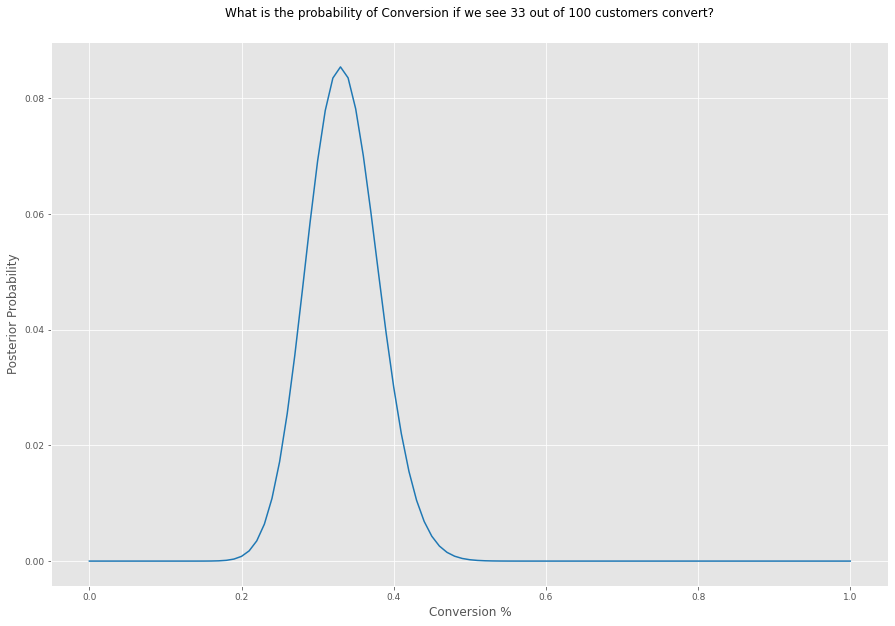

In [66]:
# libarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform
from scipy.stats import binom

# style
from ipynb.fs.full.Style_sheet import *
plt.style.use(style_use)
plt.rcParams.update(style_params)

# grid
n_conv = 33
n_conv = np.array([n_conv])
p_conv = np.arange(0, 1.01, 0.01)
g = pd.DataFrame([x, y] for x in n_conv for y in p_conv)
g.columns = ['n_conv', 'p_conv']

# prior
g['prior'] = uniform.pdf(g['p_conv'])

# likelihood
g['likelihood'] = binom.pmf(g['n_conv'], 100, g['p_conv'])

# posterior
g['p_post'] = g['prior'] * g['likelihood']
g['p_post'] /= g['p_post'].sum()

# viz
fig, ax_1 = plt.subplots(1, 1, figsize=(15,10))

def viz_line(ax, data, x, y, c, ttl, xlb, ylb):
    sns.lineplot(ax=ax, data=data, x=x, y=y, color=c)
    ax.set_title(ttl)
    ax.set_xlabel(xlb)
    ax.set_ylabel(ylb)
    return ax

ttl = 'What is the probability of Conversion if we see 33 out of 100 customers convert?'

viz_line(ax_1, g, 'p_conv', 'p_post', palette_paired[1], ttl, 'Conversion %', 'Posterior Probability')

plt.show()

<hr>

<br>

<h3><font color='grey'>Grid approximation</font></h3>

<ul>
    <li><b><code>Grid Approximation</code></b> - Developing a matrix of outcomes <code>n_conv</code> versus probabilities <code>p_conv</code> lays the foundations for analysing distribution. Each <code>n_conv</code> outcome will consist of 100 rows of different potential probabilities (0-100%). With the combinations neatly arranged, the <code>likelihood</code> of a particular combination can be computed further below.</li>
</ul>

In [54]:
# grid
n_conv = np.arange(0, 101, 1)
p_conv = np.arange(0, 1.01, 0.01)

g = pd.DataFrame([x, y] for x in n_conv for y in p_conv)
g.columns = ['n_conv', 'p_conv']
g

,n_conv,p_conv
0,0,0.00
1,0,0.01
2,0,0.02
3,0,0.03
4,0,0.04
...,...,...
10196,100,0.96
10197,100,0.97
10198,100,0.98
10199,100,0.99


<hr>

<br>

<h3><font color='grey'>Prior</font></h3>

<ul>
    <li><b><code>Prior</code></b> - What do we understand about probability before seeing any data? This is domain knowledge which can be factored into a model, in the form of a probability, or estimation. If no knowledge is held, then <code>uniform</code> distribution is appropriate, i.e. since we know nothing, every outcome has the same probability.</li>
</ul>

In [55]:
from scipy.stats import uniform
g['prior'] = uniform.pdf(g['p_conv'])
g

,n_conv,p_conv,prior
0,0,0.00,1.0
1,0,0.01,1.0
2,0,0.02,1.0
3,0,0.03,1.0
4,0,0.04,1.0
...,...,...,...
10196,100,0.96,1.0
10197,100,0.97,1.0
10198,100,0.98,1.0
10199,100,0.99,1.0


<hr>

<br>

<h3><font color='grey'>Likelihood</font></h3>

<ul>
    <li><b><code>Likelihood</code></b> - Computes the likelihood of observing <code>n_conv</code> number of conversions given the probability of conversion is <code>p_conv</code>. Since conversion is a binary outcome, we model model <code>binomial distribution</code> using <code>pmf</code> (probability mass function, akin to a pdf for discrete outcomes). 
        <br><br>This results in the <code>likelihood</code> field, which illustrates <i>there's a 100% likelihood of observing 0 conversions when probability of conversion is 0%</i>, likelwise <i>there's a 37% likelihood of observing 0 conversions when probability of conversion is 1%</i>.</li>
</ul>

In [56]:
from scipy.stats import binom
g['likelihood'] = binom.pmf(g['n_conv'], 100, g['p_conv'])
g

,n_conv,p_conv,prior,likelihood
0,0,0.00,1.0,1.000000
1,0,0.01,1.0,0.366032
2,0,0.02,1.0,0.132620
3,0,0.03,1.0,0.047553
4,0,0.04,1.0,0.016870
...,...,...,...,...
10196,100,0.96,1.0,0.016870
10197,100,0.97,1.0,0.047553
10198,100,0.98,1.0,0.132620
10199,100,0.99,1.0,0.366032


<hr>

<br>

<h3><font color='grey'>Posterior probability</font></h3>

<ul>
    <li><b><code>Posterior Probability</code></b> - What we know about the model having calculated likelihood and factored in our prior knoweldge. This the continuation of Bayes' Theorem, which is the multiplication of <code>prior</code> and <code>likelihood</code>. The resultant <code>p_post</code> is scaled so that the values total to 1 and, therefore, represent a true distribution.</li>
</ul>

In [65]:
g['p_post'] = g['prior'] * g['likelihood']
g['p_post'] /= g['p_post'].sum()
g

,n_conv,p_conv,prior,likelihood,p_post
0,0,0.00,1.0,1.000000,0.009901
1,0,0.01,1.0,0.366032,0.003624
2,0,0.02,1.0,0.132620,0.001313
3,0,0.03,1.0,0.047553,0.000471
4,0,0.04,1.0,0.016870,0.000167
...,...,...,...,...,...
10196,100,0.96,1.0,0.016870,0.000167
10197,100,0.97,1.0,0.047553,0.000471
10198,100,0.98,1.0,0.132620,0.001313
10199,100,0.99,1.0,0.366032,0.003624


<hr>

<br>

<h3><font color='grey'>Subset</font></h3>

<ul>
    <li><b><code>Subsetting & re-scaling</code></b> - With <code>p_post</code> in place, the <code>grid</code> can be subsetted for a particular value and re-scaled to produce a <code>p_post</code> for a designated outcome.</li>
</ul>

In [64]:
import warnings
warnings.filterwarnings('ignore')

g2 = g[g['n_conv']==33]
g2['p_post'] /= g2['p_post'].sum()
g2

,n_conv,p_conv,prior,likelihood,p_post
3333,33,0.00,1.0,0.000000e+00,0.000000e+00
3334,33,0.01,1.0,1.502889e-40,1.517918e-40
3335,33,0.02,1.0,6.538918e-31,6.604307e-31
3336,33,0.03,1.0,2.128514e-25,2.149799e-25
3337,33,0.04,1.0,1.410981e-21,1.425091e-21
...,...,...,...,...,...
3429,33,0.96,1.0,1.668549e-68,1.685235e-68
3430,33,0.97,1.0,9.999085e-77,1.009908e-76
3431,33,0.98,1.0,2.232745e-88,2.255073e-88
3432,33,0.99,1.0,2.115098e-108,2.136249e-108
